In [140]:
%matplotlib inline

# data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns

# modeling

from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import random

# necessary libraries for EDA and visualization

from collections import Counter
from itertools import combinations

# Import necessary libraries for association rule mining

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

In [9]:
url = 'steam.csv'
df = pd.read_csv(url)

In [10]:
print("Dataset Overview:")
print(df.head())
print(df.info())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Overview:
   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-playe

In [11]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


In [12]:
# Drop rows with missing values in 'publisher' and 'developer' columns
df = df.dropna(subset=['publisher', 'developer'])


print("\nMissing Values After Dropping Rows:")
print(df.isnull().sum())


Missing Values After Dropping Rows:
appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


In [13]:
df['genres'] = df['genres'].fillna('Unknown')

# Handle missing 'name' values
df['name'] = df['name'].fillna('Unknown Game')

# Step 2: Handle duplicates
# Remove duplicate rows
df = df.drop_duplicates()

In [14]:
print("\nCleaned Dataset Overview:")
print(df.head())
print(df.info())
print(f"Number of rows after cleaning: {df.shape[0]}")
print(f"Number of columns after cleaning: {df.shape[1]}")


Cleaned Dataset Overview:
   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Mu

In [10]:
# For market basket analysis, we need to create transaction item sets from the dataset
# Assuming 'appid' is unique for each game and we need to group transactions by a common user identifier (e.g., 'user_id')
# Note: The provided dataset might not contain a user identifier; for demonstration, we'll simulate transactions.

# Simulate transactions (this part might need adaptation based on the actual dataset structure)
# Let's assume each row represents a purchase transaction with multiple games bought together
# For simplicity, creating a dummy user identifier and simulating transaction data

# Create a dummy user_id column for simulation purposes
df['user_id'] = np.random.randint(1, 100, size=df.shape[0])

# Aggregate games bought together into a transaction list
transactions = df.groupby('user_id')['name'].apply(list).reset_index()

# Display the first few transactions
print("\nSample Transactions:")
print(transactions.head())

# Save the transaction data to a new CSV file
transactions_file_path = 'steam_store_games_transactions.csv'
transactions.to_csv(transactions_file_path, index=False)
print(f"Transaction data saved to {transactions_file_path}")


Sample Transactions:
   user_id                                               name
0        1  [Half-Life: Blue Shift, Gumboy Tournament, Lux...
1        2  [Runaway, The Dream of The Turtle, DeathSpank,...
2        3  [X2: The Threat, Making History: The Calm & th...
3        4  [Ultimate Doom, HeXen: Beyond Heretic, Hospita...
4        5  [Rome: Total War™ - Alexander, Nexus - The Jup...
Transaction data saved to steam_store_games_transactions.csv


In [15]:
# Load the cleaned transaction data
transactions = pd.read_csv('steam_store_games_transactions.csv')

In [16]:
# Analyze the frequency of game purchases
# Flatten the list of transactions to count individual game purchases
all_games = [game for sublist in transactions['name'] for game in sublist.split(', ')]
game_counts = Counter(all_games)

In [17]:
# Convert to a DataFrame for easy visualization
game_counts_df = pd.DataFrame(game_counts.items(), columns=['Game', 'Count']).sort_values(by='Count', ascending=False)

In [18]:
# Display the top 10 most purchased games
print("\nTop 10 Most Purchased Games:")
print(game_counts_df.head(10))


Top 10 Most Purchased Games:
                        Game  Count
2750                   Inc.'      5
8628                      'I      4
1127           'Dark Matter'      3
11525           'Space Maze'      2
5769   'Nightmare Simulator'      2
3459     'Zombie Apocalypse'      2
14097      'Beyond the Wall'      2
6861               'Castles'      2
1316             'Evolution'      2
17584     'Codename: Panzers      2


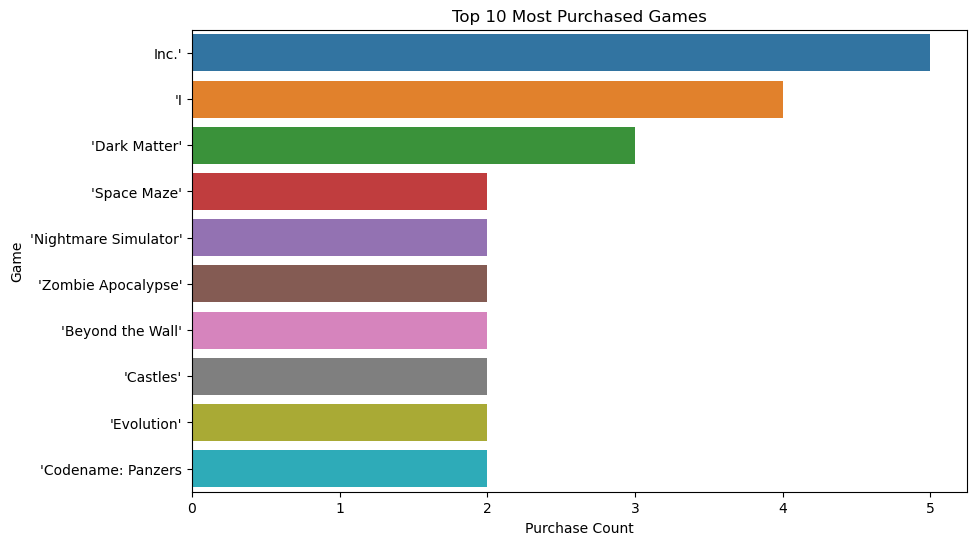

In [19]:
# Plot the top 10 most purchased games
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Game', data=game_counts_df.head(10))
plt.title('Top 10 Most Purchased Games')
plt.xlabel('Purchase Count')
plt.ylabel('Game')
plt.show()

In [20]:
# Analyze the frequency of game co-purchases
# Create a list of all pairs of games purchased together
game_pairs = []
for sublist in transactions['name']:
    games = sublist.split(', ')
    game_pairs.extend(combinations(games, 2))

In [21]:
# Count the frequency of each game pair
pair_counts = Counter(game_pairs)

# Convert to a DataFrame for easy visualization
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

In [27]:
# Create separate columns for each game in the pair
pair_counts_df['Game1'] = pair_counts_df['Pair'].apply(lambda x: x[0])
pair_counts_df['Game2'] = pair_counts_df['Pair'].apply(lambda x: x[1])

In [28]:
# Display the top 10 most common game pairs
print("\nTop 10 Most Common Game Pairs:")
print(pair_counts_df.head(10))


Top 10 Most Common Game Pairs:
                                                      Pair  Count  \
2662138                    ('Ultimate Arena', 'Dexterity')      2   
1528011        ('Hack, 'Ultimate Select Hero / 究极勇者的选择传说')      2   
1527997               ('Hack, 'KOEWOTAYORINI SP / 声之寄托SP')      2   
1527998                    ('Hack, 'Fleets of Ascendancy')      2   
1527999               ('Hack, "Time Gate: Knight's Chase")      2   
1528000  ('Hack, 'The way to defeat the Archfiend / 打倒魔...      2   
1528001                         ('Hack, 'American Farmer')      2   
1528002  ('Hack, 'Shoppe Keep 2 Character Creator Previ...      2   
1528003                     ('Hack, 'Blazing Core (beta)')      2   
1528004                               ('Hack, 'Levelhead')      2   

                    Game1                                        Game2  
2662138  'Ultimate Arena'                                  'Dexterity'  
1528011             'Hack           'Ultimate Select Hero / 究极

In [29]:
# Plot the top 10 most common game pairs
top_pairs = pair_counts_df.head(10)
pairs = top_pairs['Pair'].apply(lambda x: f"{x[0]} & {x[1]}")
counts = top_pairs['Count']

C:\Users\tarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31350 (\N{CJK UNIFIED IDEOGRAPH-7A76}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26497 (\N{CJK UNIFIED IDEOGRAPH-6781}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21191 (\N{CJK UNIFIED IDEOGRAPH-52C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tarab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_

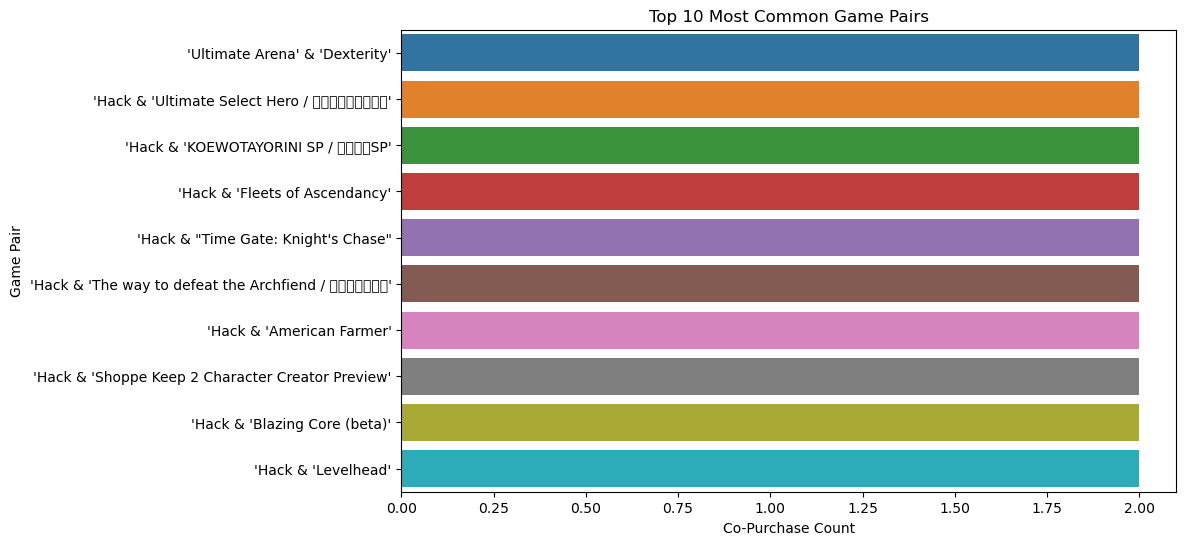

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=pairs)
plt.title('Top 10 Most Common Game Pairs')
plt.xlabel('Co-Purchase Count')
plt.ylabel('Game Pair')
plt.show()

In [30]:
# heatmap of game co-purchases
# pivot table of co-purchases for the heatmap
pair_matrix = pair_counts_df.pivot_table(index='Game1', columns='Game2', values='Count', fill_value=0)


In [37]:
top_n = 10000  # Adjust this number as needed
top_games = game_counts_df.head(top_n)['Game'].tolist()

In [38]:
# Filter the transaction data to include only transactions with these top games
filtered_transactions = transactions['name'].apply(lambda x: [game for game in x.split(', ') if game in top_games])

In [39]:
# Recreate the list of all pairs of games purchased together from the filtered transactions
filtered_game_pairs = []
for sublist in filtered_transactions:
    filtered_game_pairs.extend(combinations(sublist, 2))

In [40]:
# Recompute the frequency of each filtered game pair
filtered_pair_counts = Counter(filtered_game_pairs)

In [41]:
# Convert to a DataFrame for easy visualization
filtered_pair_counts_df = pd.DataFrame(filtered_pair_counts.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

In [42]:
# Create separate columns for each game in the filtered pair
filtered_pair_counts_df['Game1'] = filtered_pair_counts_df['Pair'].apply(lambda x: x[0])
filtered_pair_counts_df['Game2'] = filtered_pair_counts_df['Pair'].apply(lambda x: x[1])

In [43]:
# Pivot table of filtered co-purchases for the heatmap
filtered_pair_matrix = filtered_pair_counts_df.pivot_table(index='Game1', columns='Game2', values='Count', fill_value=0)

C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.draw()
C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.draw()
C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.draw()
C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.draw()
C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.draw()
C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.

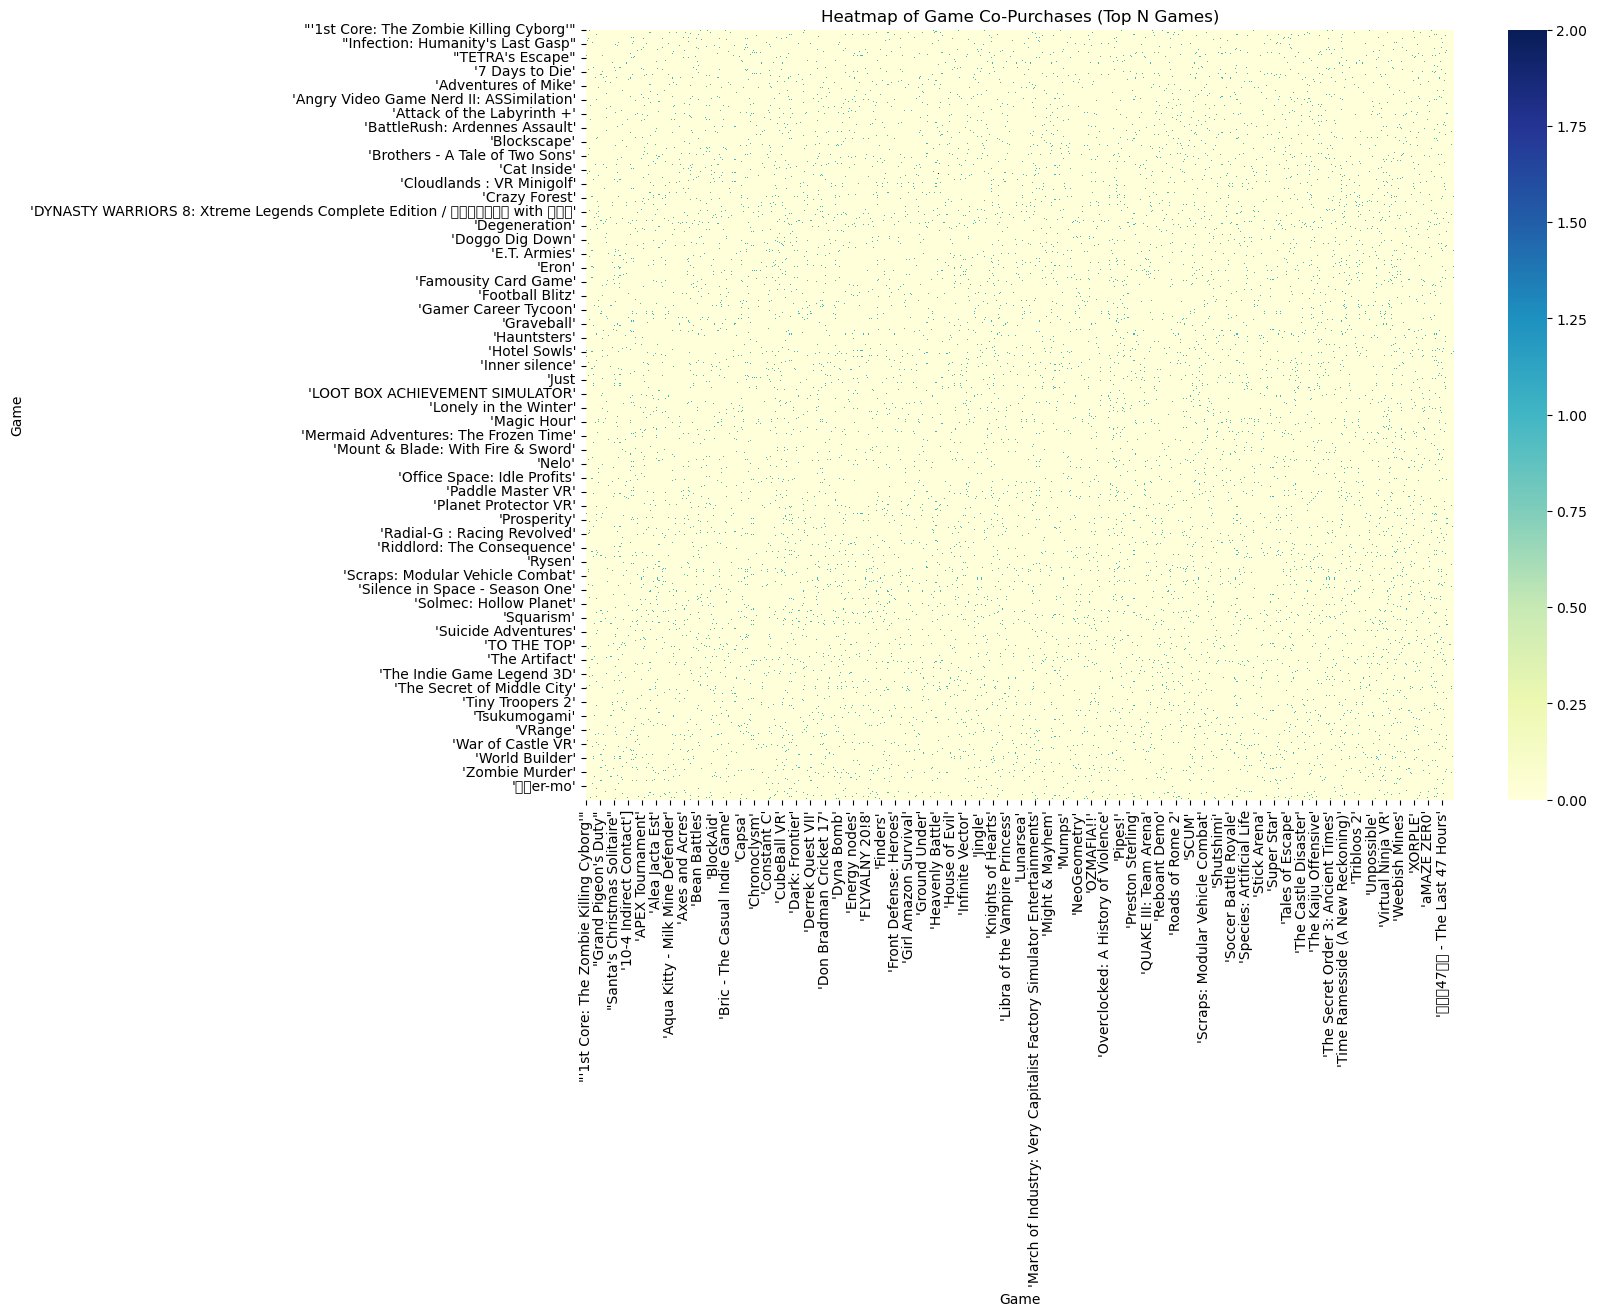

In [44]:
# Plot the heatmap with the filtered data
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_pair_matrix, cmap='YlGnBu')
plt.title('Heatmap of Game Co-Purchases (Top N Games)')
plt.xlabel('Game')
plt.ylabel('Game')
plt.show()

Key Steps Explained:

Import Libraries: Additional libraries for EDA and visualization are imported.
Load Transaction Data: The cleaned transaction data is loaded from the CSV file.

Analyze Game Purchase Frequency:

Flatten the list of transactions to count individual game purchases.
Use Counter to count the frequency of each game.

Convert the counts to a DataFrame and display the top 10 most purchased games.
Plot the top 10 most purchased games using a bar chart.

Analyze Game Co-Purchase Frequency:

Create a list of all pairs of games purchased together using combinations.
Use Counter to count the frequency of each game pair.

Convert the counts to a DataFrame and display the top 10 most common game pairs.

Plot the top 10 most common game pairs using a bar chart.

Create a Heatmap of Game Co-Purchases:

Create a pivot table of co-purchases for the heatmap.
Plot the heatmap of game co-purchases using Seaborn.

Notes:

Transaction Data: Ensure that the transactions are properly formatted as lists of game names. Adjust the code if necessary to match your actual data structure.

Visualization: The bar charts and heatmaps provide a visual representation of purchase and co-purchase patterns, making it easier to identify trends and common associations.


**Step 3: Market Basket Analysis**

In this step, we will perform Market Basket Analysis using association rule mining techniques to identify frequent item sets and generate association rules. We will evaluate these rules using metrics like support, confidence, and lift to find strong associations.

In [34]:
# Convert transaction data into the required format for association rule mining
# Use the TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame

te = TransactionEncoder()
te_ary = te.fit(transactions['name'].apply(lambda x: x.split(', '))).transform(transactions['name'].apply(lambda x: x.split(', ')))
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [35]:
# Display the first few rows of the one-hot encoded transaction DataFrame
print("\nOne-Hot Encoded Transaction Data:")
print(df_transactions.head())


One-Hot Encoded Transaction Data:
   "'1st Core: The Zombie Killing Cyborg'"  "'90s Football Stars"  \
0                                    False                  False   
1                                    False                  False   
2                                    False                  False   
3                                    False                  False   
4                                    False                  False   

   "'n Verlore Verstand"  "24 Hours 'til Rescue"  "7'scarlet"  \
0                  False                   False        False   
1                  False                   False        False   
2                  False                   False        False   
3                  False                   False        False   
4                  False                   False        False   

   "7th Sea: A Pirate's Pact"  "A Bastard's Tale"  \
0                       False               False   
1                       False               False   


In [122]:
# Increase the minimum support threshold
min_support_threshold = 0.011  # Adjust this value as needed

In [123]:
# Filter out infrequent items first
item_frequencies = df_transactions.sum(axis=0)
frequent_items = item_frequencies[item_frequencies >= min_support_threshold * len(df_transactions)].index

In [124]:
# Filter the transaction DataFrame to keep only the frequent items
df_transactions_filtered = df_transactions[frequent_items]

In [125]:
# Use a random sample of the transactions
sample_fraction = 0.5  # Adjust this value based on available memory
df_transactions_sampled = df_transactions_filtered.sample(frac=sample_fraction, random_state=42)

In [126]:
# Display the shape of the original and sampled DataFrames
print("Original DataFrame shape:", df_transactions.shape)
print("Filtered DataFrame shape:", df_transactions_filtered.shape)
print("Sampled DataFrame shape:", df_transactions_sampled.shape)

Original DataFrame shape: (99, 27197)
Filtered DataFrame shape: (99, 50)
Sampled DataFrame shape: (50, 50)


In [127]:
# Apply the Apriori algorithm to the sampled and filtered dataset
frequent_itemsets = apriori(df_transactions_sampled, min_support=min_support_threshold, use_colnames=True)

In [128]:
# Display the frequent item sets
print("\nFrequent Item Sets:")
print(frequent_itemsets.head())


Frequent Item Sets:
   support              itemsets
0     0.02  ("Santa's Workshop")
1     0.02              ('2048')
2     0.04             ('Alone')
3     0.02   ('Beyond the Wall')
4     0.02           ('Castles')


In [129]:
# Generate association rules from the frequent item sets
# Set a minimum confidence threshold to filter out weak rules
min_confidence_threshold = 0.001
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)


Association Rules:
        antecedents          consequents  support  confidence  lift
0    ('Experience')             ('2048')     0.02         1.0  50.0
1          ('2048')       ('Experience')     0.02         1.0  50.0
2      ('The Mine')             ('2048')     0.02         0.5  25.0
3          ('2048')         ('The Mine')     0.02         1.0  25.0
4  ('City Builder')  ('Beyond the Wall')     0.02         1.0  50.0

Top 10 Association Rules by Lift:
                       antecedents                     consequents  support  \
0                   ('Experience')                        ('2048')     0.02   
47                  (Serve, 'Cook)         ('Nightmare Simulator')     0.02   
19                          ('Run)                        ('Hello)     0.02   
20                        ('Luna')               ('Hide and Seek')     0.02   
21               ('Hide and Seek')                        ('Luna')     0.02   
50         ('Nightmare Simulator')                  (Serve, 'Co

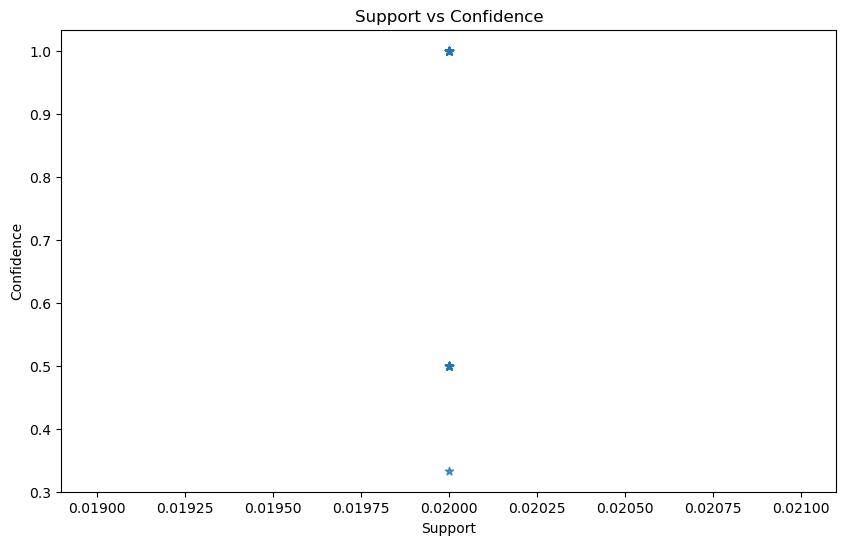

In [130]:
if rules.empty:
    print("No association rules found. Consider lowering the support or confidence thresholds.")
else:
    # Display the generated association rules
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

    # Evaluate the rules using metrics like support, confidence, and lift
    # Sort the rules by lift in descending order to find the strongest associations
    rules = rules.sort_values(by='lift', ascending=False)

    # Display the top 10 association rules
    print("\nTop 10 Association Rules by Lift:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

    # Visualize the top association rules using a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker="*")
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence')
    plt.show()

In [131]:
# Evaluate the rules using metrics like support, confidence, and lift
# Sort the rules by lift in descending order to find the strongest associations
rules = rules.sort_values(by='lift', ascending=False)

In [132]:
# Display the top 10 association rules
print("\nTop 10 Association Rules by Lift:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top 10 Association Rules by Lift:
                antecedents                     consequents  support  \
0            ('Experience')                        ('2048')     0.02   
42     ('The Mine', '2048')                  ('Experience')     0.02   
47           (Serve, 'Cook)         ('Nightmare Simulator')     0.02   
11          ('Dark Matter')                   ('Evolution')     0.02   
10            ('Evolution')                 ('Dark Matter')     0.02   
8                   (Serve)                         ('Cook)     0.02   
51                  ('Cook)  (Serve, 'Nightmare Simulator')     0.02   
7                   ('Cook)         ('Nightmare Simulator')     0.02   
6   ('Nightmare Simulator')                         ('Cook)     0.02   
5       ('Beyond the Wall')                ('City Builder')     0.02   

    confidence  lift  
0          1.0  50.0  
42         1.0  50.0  
47         1.0  50.0  
11         1.0  50.0  
10         1.0  50.0  
8          1.0  50.0  
51         

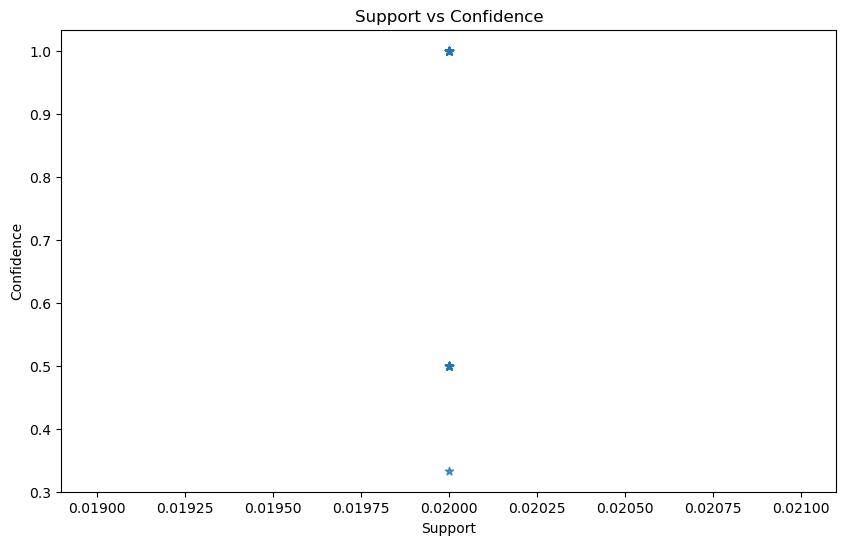

In [133]:
# Visualize the top association rules using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker="*")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

***Key Steps Explained:***

Import Libraries: Import the necessary libraries for association rule mining, including apriori, association_rules, and TransactionEncoder from the mlxtend library.

**Transform Transaction Data:**

Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame. This format is required for applying the Apriori algorithm.
Apply a lambda function to split the transaction strings into lists of games.
One-Hot Encoded DataFrame: Display the first few rows of the one-hot encoded transaction DataFrame to ensure the transformation was successful.

**Apply Apriori Algorithm:**

Set a minimum support threshold to filter out infrequent item sets. The min_support_threshold is set to 0.01, meaning we only consider item sets that appear in at least 1% of the transactions.
Apply the Apriori algorithm to identify frequent item sets and display the first few frequent item sets.
Generate Association Rules:

Set a minimum confidence threshold to filter out weak rules. The min_confidence_threshold is set to 0.1, meaning we only consider rules with a confidence of at least 10%.
Generate association rules from the frequent item sets using the association_rules function and display the first few rules.
Evaluate and Sort Rules:

Evaluate the rules using metrics like support, confidence, and lift.
Sort the rules by lift in descending order to find the strongest associations and display the top 10 association rules.
Visualize Association Rules:

Use a scatter plot to visualize the relationship between support and confidence for the generated association rules.

**Explanation:**

Transaction Encoding: Transforming the transaction data into a one-hot encoded format is essential for applying the Apriori algorithm, as it requires a binary matrix input.

Support and Confidence Thresholds: Setting appropriate thresholds for support and confidence helps filter out insignificant item sets and rules, focusing on the most meaningful associations.

Evaluation Metrics: Metrics like support, confidence, and lift are crucial for evaluating the strength and significance of the association rules. Sorting by lift helps identify the strongest associations.

Visualization: The scatter plot provides a visual representation of the support and confidence of the rules, helping to identify patterns and insights.

**Step 4: Feature Engineering**

eature engineering is a critical step in enhancing the analysis of association rules by adding more context and depth to the transactional data. Here's how to proceed with this step:

**Objectives:**

1. Extract meaningful features from the transaction data.
2. Combine these features with the association rules for more nuanced insights.

**Steps:**

1. Extract Purchase Frequency: Calculate how often each game is purchased.
2. Extract Game Attributes: Combine game attributes such as genre, developer, and publisher with the transactional data.
3. Enhance Association Rules: Merge the extracted features with the association rules to provide additional context.

In [134]:
# Calculate purchase frequency for each game
purchase_frequency = df_transactions.sum(axis=0).reset_index()
purchase_frequency.columns = ['Game', 'Purchase_Frequency']

# Display the top 10 most frequently purchased games
print("Top 10 Most Frequently Purchased Games:")
print(purchase_frequency.sort_values(by='Purchase_Frequency', ascending=False).head(10))

Top 10 Most Frequently Purchased Games:
                Game  Purchase_Frequency
26987          Inc.'                   5
11618             'I                   4
6483   'Dark Matter'                   3
21556        'Surge'                   2
20291    'Solitaire'                   2
9174     'Fireflies'                   2
2812         'Ashes'                   2
14102    'Mars 2030'                   2
2317     'Alter Ego'                   2
7348         'Dodge'                   2


In [136]:
# Load the dataset containing game attributes
df_games = pd.read_csv('steam.csv')

# Select relevant columns
df_games_attributes = df_games[['name', 'genres', 'developer', 'publisher']]
df_games_attributes.columns = ['Game', 'Genres', 'Developer', 'Publisher']

# Display the first few rows of the game attributes DataFrame
print("Game Attributes DataFrame:")
print(df_games_attributes.head())

Game Attributes DataFrame:
                        Game  Genres         Developer Publisher
0             Counter-Strike  Action             Valve     Valve
1      Team Fortress Classic  Action             Valve     Valve
2              Day of Defeat  Action             Valve     Valve
3         Deathmatch Classic  Action             Valve     Valve
4  Half-Life: Opposing Force  Action  Gearbox Software     Valve


In [137]:
# Merge purchase frequency with game attributes
df_features = pd.merge(purchase_frequency, df_games_attributes, on='Game', how='left')

# Display the combined DataFrame
print("Combined DataFrame with Purchase Frequency and Game Attributes:")
print(df_features.head())

Combined DataFrame with Purchase Frequency and Game Attributes:
                                      Game  Purchase_Frequency Genres  \
0  "'1st Core: The Zombie Killing Cyborg'"                   1    NaN   
1                    "'90s Football Stars"                   1    NaN   
2                    "'n Verlore Verstand"                   1    NaN   
3                   "24 Hours 'til Rescue"                   1    NaN   
4                              "7'scarlet"                   1    NaN   

  Developer Publisher  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  


In [138]:
# Convert frozensets to strings for merging
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0] if len(x) == 1 else ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0] if len(x) == 1 else ', '.join(list(x)))

# Merge antecedents and consequents with the features DataFrame
rules = pd.merge(rules, df_features, left_on='antecedents', right_on='Game', how='left')
rules = pd.merge(rules, df_features, left_on='consequents', right_on='Game', how='left', suffixes=('_antecedent', '_consequent'))

# Select and rename columns for clarity
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 
               'Purchase_Frequency_antecedent', 'Genres_antecedent', 'Developer_antecedent', 'Publisher_antecedent',
               'Purchase_Frequency_consequent', 'Genres_consequent', 'Developer_consequent', 'Publisher_consequent']]

# Display the enhanced association rules
print("Enhanced Association Rules with Features:")
print(rules.head())

Enhanced Association Rules with Features:
          antecedents            consequents  support  confidence  lift  \
0        'Experience'                 '2048'     0.02         1.0  50.0   
1  'The Mine', '2048'           'Experience'     0.02         1.0  50.0   
2        Serve, 'Cook  'Nightmare Simulator'     0.02         1.0  50.0   
3       'Dark Matter'            'Evolution'     0.02         1.0  50.0   
4         'Evolution'          'Dark Matter'     0.02         1.0  50.0   

   Purchase_Frequency_antecedent Genres_antecedent Developer_antecedent  \
0                            2.0               NaN                  NaN   
1                            NaN               NaN                  NaN   
2                            NaN               NaN                  NaN   
3                            3.0               NaN                  NaN   
4                            2.0               NaN                  NaN   

  Publisher_antecedent  Purchase_Frequency_consequent Ge

**Explanation:**

1. Purchase Frequency: This step calculates how often each game is purchased, which can help identify popular games and their influence on co-purchases.


2. Game Attributes: Extracting attributes such as genre, developer, and publisher provides additional context that can be used to analyze trends and patterns in game purchases.


3. Combine Features with Association Rules: By merging the purchase frequency and game attributes with the association rules, we add more context to the rules, making it easier to understand the relationships between games and identify patterns based on game attributes.

This feature engineering step enriches the transactional data, allowing for more detailed and insightful analysis of the association rules.

**Step 5: Visualization**

The objective of this step is to create visualizations to present the identified associations and recommendations, such as network graphs of game associations and heatmaps of rule metrics. Additionally, we aim to provide actionable insights for cross-promotion and bundling strategies.

**Steps:**

1. Network Graph of Game Associations: Visualize the associations between games using a network graph.
2. Heatmap of Rule Metrics: Create a heatmap to show the strength of the associations using support, confidence, and lift.
3. Actionable Insights: Provide insights based on the visualizations for cross-promotion and bundling strategies.


In [141]:
# Create a network graph
G = nx.Graph()

In [142]:
# Add edges based on the association rules
for idx, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

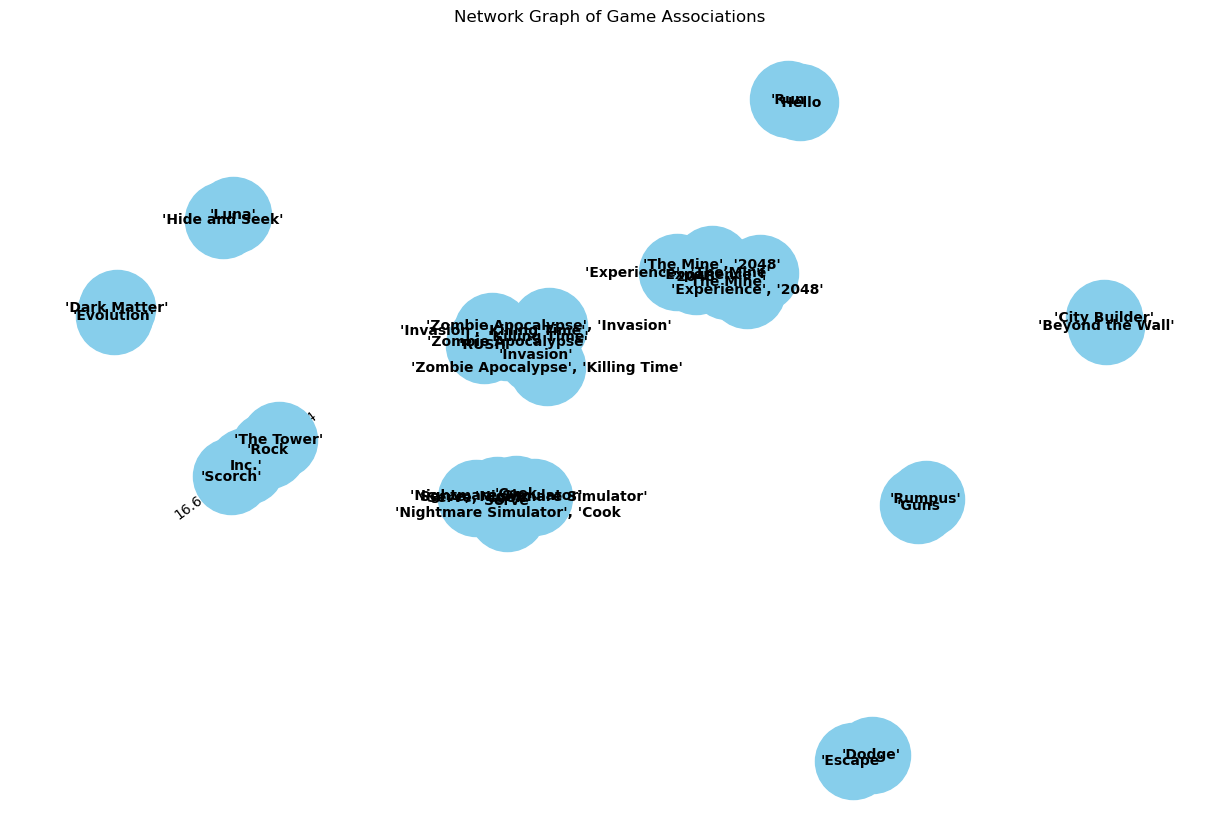

In [143]:
# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.1)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Network Graph of Game Associations")
plt.show()

**Explanation:**

We create a network graph using networkx to visualize the associations between games. Edges are added based on the association rules, with weights representing the lift of each rule. The graph helps to identify which games are frequently associated with each other.

C:\Users\tarab\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


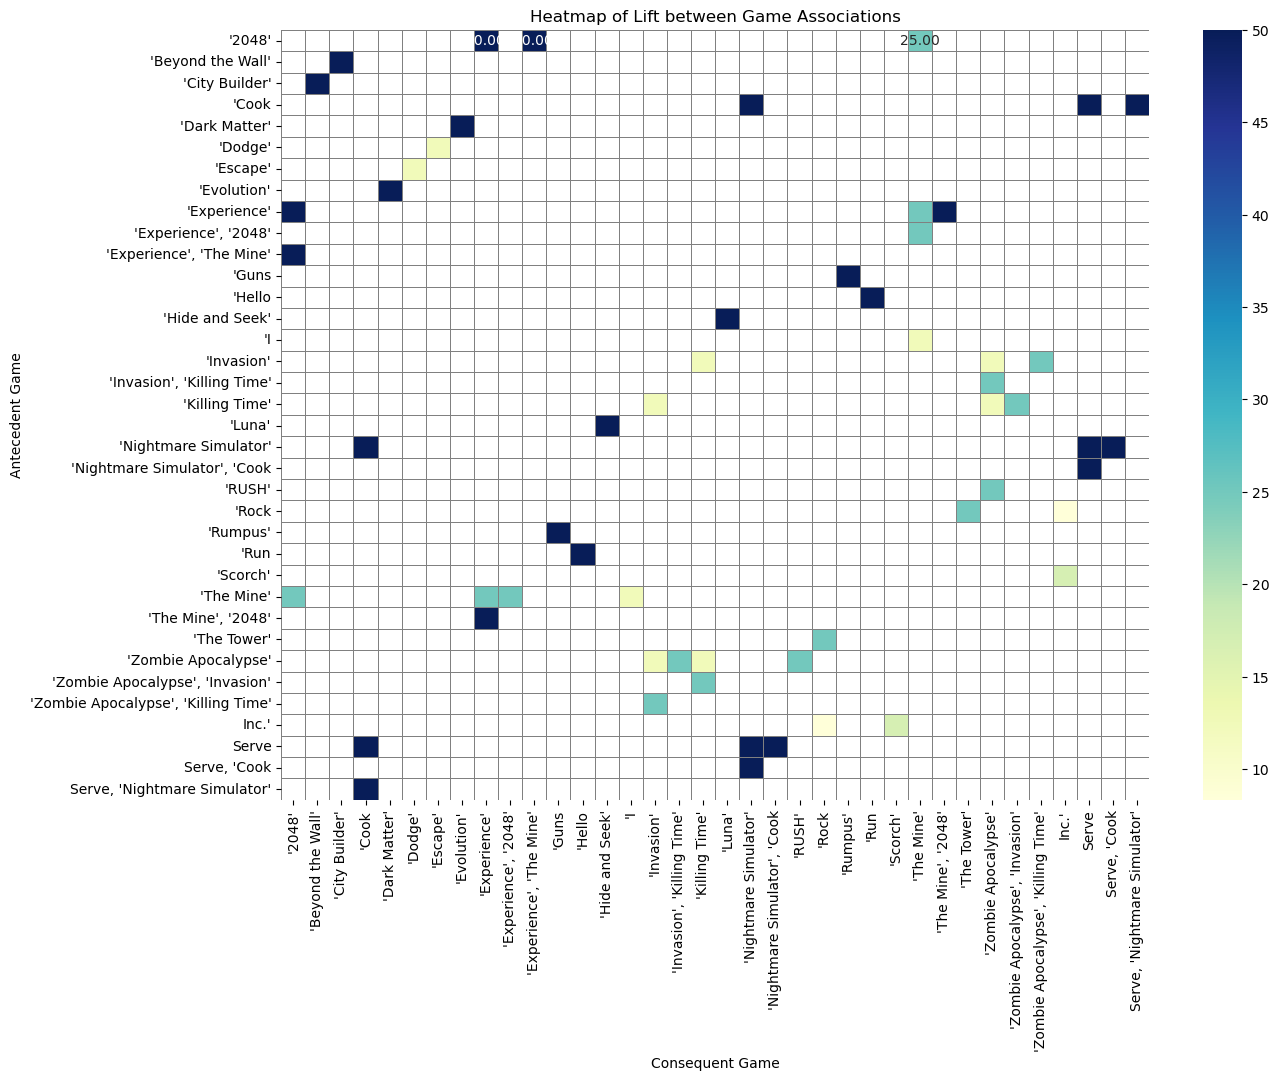

In [145]:
# Prepare data for heatmap using pivot_table
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor='grey')
plt.title("Heatmap of Lift between Game Associations")
plt.xlabel("Consequent Game")
plt.ylabel("Antecedent Game")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Explanation:**

We create a heatmap using seaborn to visualize the lift between game associations. The heatmap provides a clear representation of the strength of associations, helping to identify strong and weak associations between games.

In [146]:
# Display top rules by lift to identify strong associations
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
print("Top 10 Association Rules by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 10 Association Rules by Lift:
                     antecedents                   consequents  support  \
0                   'Experience'                        '2048'     0.02   
15                  'Experience'            'The Mine', '2048'     0.02   
1             'The Mine', '2048'                  'Experience'     0.02   
27                         Serve         'Nightmare Simulator'     0.02   
26                        '2048'                  'Experience'     0.02   
25                        '2048'      'Experience', 'The Mine'     0.02   
24      'Experience', 'The Mine'                        '2048'     0.02   
23  Serve, 'Nightmare Simulator'                         'Cook     0.02   
22         'Nightmare Simulator'                  Serve, 'Cook     0.02   
21                         Serve  'Nightmare Simulator', 'Cook     0.02   

    confidence  lift  
0          1.0  50.0  
15         1.0  50.0  
1          1.0  50.0  
27         1.0  50.0  
26         1.0  50.0  
25

In [147]:
# Generate actionable insights
cross_promotion_insights = []
bundling_insights = []

In [148]:
for idx, row in top_rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    lift = row['lift']
    confidence = row['confidence']
    
    insight = f"Promote {consequent} to buyers of {antecedent} (Lift: {lift:.2f}, Confidence: {confidence:.2f})"
    cross_promotion_insights.append(insight)
    
    if lift > 1.5:
        bundling_insight = f"Consider bundling {antecedent} with {consequent} (Lift: {lift:.2f})"
        bundling_insights.append(bundling_insight)

In [149]:
print("\nCross-Promotion Insights:")
for insight in cross_promotion_insights:
    print(insight)


Cross-Promotion Insights:
Promote '2048' to buyers of 'Experience' (Lift: 50.00, Confidence: 1.00)
Promote 'The Mine', '2048' to buyers of 'Experience' (Lift: 50.00, Confidence: 1.00)
Promote 'Experience' to buyers of 'The Mine', '2048' (Lift: 50.00, Confidence: 1.00)
Promote 'Nightmare Simulator' to buyers of Serve (Lift: 50.00, Confidence: 1.00)
Promote 'Experience' to buyers of '2048' (Lift: 50.00, Confidence: 1.00)
Promote 'Experience', 'The Mine' to buyers of '2048' (Lift: 50.00, Confidence: 1.00)
Promote '2048' to buyers of 'Experience', 'The Mine' (Lift: 50.00, Confidence: 1.00)
Promote 'Cook to buyers of Serve, 'Nightmare Simulator' (Lift: 50.00, Confidence: 1.00)
Promote Serve, 'Cook to buyers of 'Nightmare Simulator' (Lift: 50.00, Confidence: 1.00)
Promote 'Nightmare Simulator', 'Cook to buyers of Serve (Lift: 50.00, Confidence: 1.00)


In [150]:
print("\nBundling Insights:")
for insight in bundling_insights:
    print(insight)


Bundling Insights:
Consider bundling 'Experience' with '2048' (Lift: 50.00)
Consider bundling 'Experience' with 'The Mine', '2048' (Lift: 50.00)
Consider bundling 'The Mine', '2048' with 'Experience' (Lift: 50.00)
Consider bundling Serve with 'Nightmare Simulator' (Lift: 50.00)
Consider bundling '2048' with 'Experience' (Lift: 50.00)
Consider bundling '2048' with 'Experience', 'The Mine' (Lift: 50.00)
Consider bundling 'Experience', 'The Mine' with '2048' (Lift: 50.00)
Consider bundling Serve, 'Nightmare Simulator' with 'Cook (Lift: 50.00)
Consider bundling 'Nightmare Simulator' with Serve, 'Cook (Lift: 50.00)
Consider bundling Serve with 'Nightmare Simulator', 'Cook (Lift: 50.00)


**Explanation:**

- We display the top 10 association rules sorted by lift to identify strong associations.
- We generate actionable insights for cross-promotion and bundling strategies based on the lift and confidence of the association rules. Cross-promotion insights suggest promoting one game to buyers of another game, while bundling insights suggest considering bundles for games with strong associations.

**Summary:**

- **Network Graph:** Visualizes game associations and helps identify which games are frequently bought together.

- **Heatmap:** Shows the strength of associations using the lift metric, making it easy to identify strong and weak associations.

- **Actionable Insights:** Provides practical recommendations for cross-promotion and bundling strategies based on the association rules.

This step enriches the analysis by providing clear visualizations and actionable insights, which are crucial for making data-driven decisions in cross-promotion and bundling strategies.